# Library Data Contest 2019
**Authors:** Haleh Ale-Ahmand, Moein Hosseini<br/>
March 2019

**QUESTIONS:**<br/>
1. Are citations subset of traffic stops? <br/>
'When a traffic stop is made, a warning issued by the officer is a statement that the motorist has committed some offense, but is being spared the actual citation.'

## 0. PACKAGES AND FUNCTIONS

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pytz
from datetime import datetime

In [109]:
def replace_time(row):
    return row['DateTime_Object'].replace( minute = row['Minute'])

# 1. READ DATA

## 1.1 Evanston Citations<br/>
'Citations issued by officers during their tour of duty, excluding parking citations.'

In [246]:
citations_df = pd.read_csv('./Data/Evanston_Citations.csv')
citations_df.head(5)

,Citation Number,Citation Date,Citation Time,Day of the Week,Age,Race,Sex,Police Beat
0,YW341477,04/04/2031 12:00:00 AM,803.0,Fri,42.0,White,Female,NaN
1,YW436498,08/08/2020 12:00:00 AM,1839.0,Sat,38.0,Asian,Female,NaN
2,SE588873,03/22/2019 12:00:00 AM,908.0,Fri,55.0,White,Female,NaN
3,SE588869,03/22/2019 12:00:00 AM,831.0,Fri,67.0,White,Female,NaN
4,SE588925,03/22/2019 12:00:00 AM,1804.0,Fri,38.0,Black,Male,NaN


## 1.2 Evanston Crashes

In [7]:
crashes_df = pd.read_csv('./Data/Evanston_Traffic_Crashes.csv')
crashes_df.head(5)

,Accident ID (FK),Day of the Week,Accident Date,Accident Time,Accident Street Name,Direction from Intersecting Road,GEO-X,GEO-Y,Police Beat
0,19002236,Thu,03/21/2019,740,RIDGE,NaN,0,0,NaN
1,19002255,Thu,03/21/2019,1630,DEMPSTER,NaN,0,0,NaN
2,19002238,Thu,03/21/2019,940,FOWLER AV,NaN,0,0,NaN
3,19002251,Thu,03/21/2019,1544,JUDSON AVE,NaN,0,0,NaN
4,19002237,Thu,03/21/2019,749,CRAIN,NaN,0,0,NaN


## 1.3 Evanston Traffic Stops

In [9]:
stops_df = pd.read_csv('./Data/Traffic_Stops_in_Evanston.csv')
stops_df.head(5)

,rpmainid,Stop Date,Stop Time,Day of the Week,Age,Race,Sex,Street Number,Street Name,Police Beat
0,45963,03/23/2019 12:00:00 AM,20,Sat,22.0,White,Female,800,LINCOLN ST,76.0
1,45953,03/22/2019 12:00:00 AM,1800,Fri,67.0,White,Female,500,CHICAGO AV/SOUTH BL,72.0
2,45954,03/22/2019 12:00:00 AM,1752,Fri,38.0,White,Male,800,RIDGE AV/WASHINGTON ST,71.0
3,45924,03/22/2019 12:00:00 AM,1048,Fri,19.0,Black,Male,900,MULFORD ST/RIDGE AV,78.0
4,45915,03/22/2019 12:00:00 AM,1036,Fri,67.0,Black,Male,100,BARTON AV/HOWARD ST,78.0


# 2. Data Preprocessing

## 1.1 Evanston Citations

In [247]:
citations_df.isna().sum()

Citation Number        1
Citation Date          1
Citation Time          1
Day of the Week        1
Age                   49
Race                1512
Sex                   50
Police Beat        20842
dtype: int64

In [248]:
# Drop 'Police Beat'
citations_df.drop(['Police Beat'], axis = 1, inplace= True)
# Number of rows
print(len(citations_df.index))

24815


In [249]:
# Remove NAs
citations_df.dropna(subset = ['Citation Number', 'Citation Time', 'Day of the Week'], inplace= True)
# Number of rows
print(len(citations_df.index))

24814


In [250]:
# number of negative ages
print(citations_df['Age'][citations_df['Age'] < 0].size)
# Remove Negative Age
citations_df = citations_df.loc[np.logical_not(citations_df['Age'] < 0), :]
# Number of rows
print(len(citations_df.index))

1
24813


# 2. Datetime
# 2.1 Evanston Citations
What are the types of the columns?

In [252]:
citations_df.dtypes

Citation Number     object
Citation Date       object
Citation Time      float64
Day of the Week     object
Age                float64
Race                object
Sex                 object
dtype: object

In [253]:
# DateTime
citations_df['DateTime_Object'] = pd.to_datetime(citations_df['Citation Date'], format = '%m/%d/%Y %H:%M:%S %p')
citations_df['DateTime_Object'].dtype

dtype('<M8[ns]')

Time in `Citation Date` is not correct. We need to modify it unsing `Citation Time`. First, change citation time to integer and then to string:

In [254]:
citations_df['Citation Time'] = citations_df['Citation Time'].astype(int).astype(str)
# MINUTE
citations_df['Minute']= citations_df['Citation Time'].apply(lambda x: int(x[-2:]))
# HOUR
citations_df['Hour']  = citations_df['Citation Time'].apply(lambda x: x[:-2])
print(citations_df['Hour'].unique())
# hour 0 would be blank.
citations_df.loc[citations_df['Hour'] == '', ['Hour']] = '0'
citations_df['Hour'] = citations_df['Hour'].astype(int)

['8' '18' '9' '7' '16' '12' '11' '6' '21' '14' '10' '15' '17' '13' '5' '3'
 '4' '22' '' '19' '1' '23' '20' '2' '31' '32' '71']


# 2.2 Evanston Traffic Stops

In [260]:
stops_df['Stop Time'] = stops_df['Stop Time'].astype(int).astype(str)
# MINUTE
stops_df['Minute']= stops_df['Stop Time'].apply(lambda x: int(x[-2:]))
# HOUR
stops_df['Hour']  = stops_df['Stop Time'].apply(lambda x: x[:-2])
print(stops_df['Hour'].unique())
# hour 0 would be blank.
stops_df.loc[stops_df['Hour'] == '', ['Hour']] = '0'
stops_df['Hour'] = stops_df['Hour'].astype(int)

['' '18' '17' '10' '8' '16' '12' '20' '11' '23' '9' '1' '21' '7' '15' '14'
 '6' '13' '19' '2' '22' '3' '4' '5']


# 3. Gender

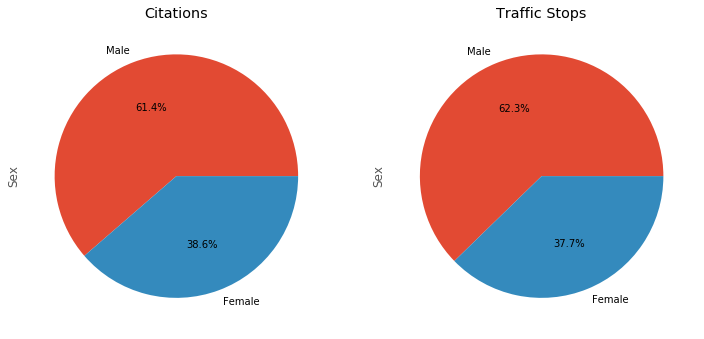

In [164]:
with plt.style.context('ggplot'):
    fig = plt.figure( figsize = (12,16))
    ax1 = fig.add_subplot(1, 2, 1)
    citations_df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax1, title = 'Citations')
    
    ax2 = fig.add_subplot(1,2, 2)
    stops_df['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax2, title = 'Traffic Stops')
    

# 4. Race

In [208]:
print(citations_df['Race'].unique())
print(stops_df['Race'].unique())

['White' 'Asian' 'Black' nan 'Unknown' 'Hispanic']
['White' 'Black' 'Asian' nan 'Hispanic' 'Unknown']


In [ ]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(1,2,1)
    citations_df['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax1, title = 'Citations')
    
    ax2 = fig.add_subplot(1,2,2)
    stops_df['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax2, title = 'Traffic Stops')

# 5. Age

In [215]:
# Citations
citations_df['Age'].describe()

# Traffic Stops

count    24766.000000
mean        39.453121
std         15.415187
min         -4.000000
25%         27.000000
50%         37.000000
75%         51.000000
max         94.000000
Name: Age, dtype: float64

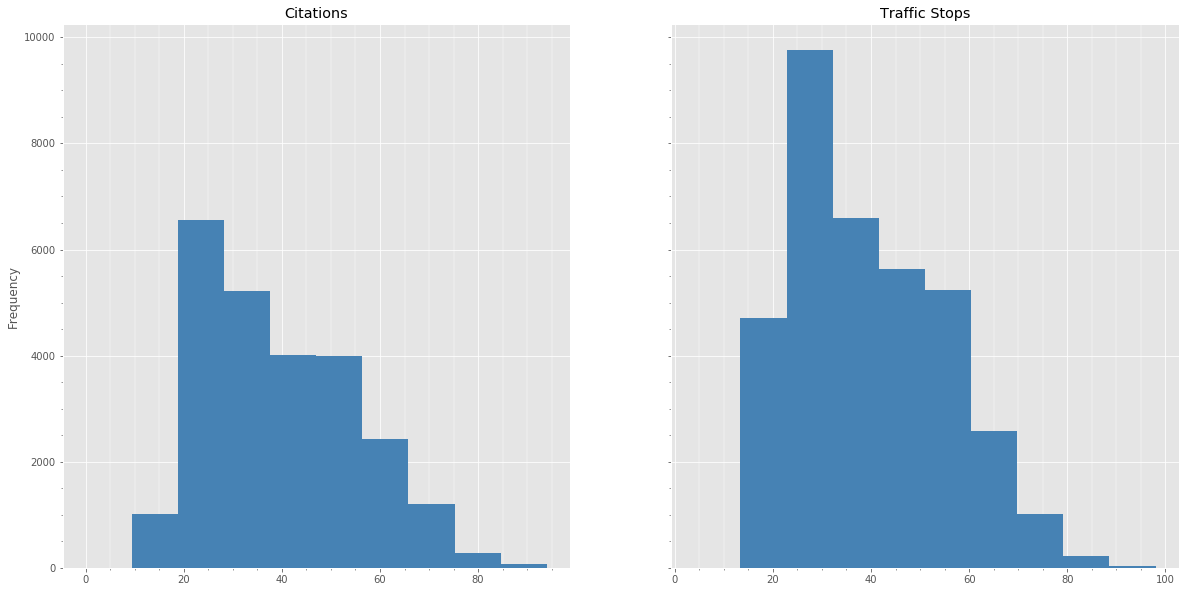

In [322]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize = (20,10), ncols = 2, nrows = 1, sharey = True)
    
    citations_df['Age'].plot(kind = 'hist', ax  = axes[0], title = 'Citations', color = 'steelblue')
    axes[0].minorticks_on()
    axes[0].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)
    
    stops_df['Age'].plot(kind = 'hist', ax = axes[1], title = 'Traffic Stops', color = 'steelblue')
    axes[1].minorticks_on()
    axes[1].xaxis.grid(b=True, which='minor', color='w', linewidth = 0.4)
    

# 6. Special Days
## 6.1 Valentine's Day

In [ ]:
df_names = ['Citations', 'Traffic Stops']
dates = ['02/14/2017 12:00:00 AM', '02/14/2018 12:00:00 AM', '02/14/2019 12:00:00 AM']
years = ['2017', '2018', '2019']

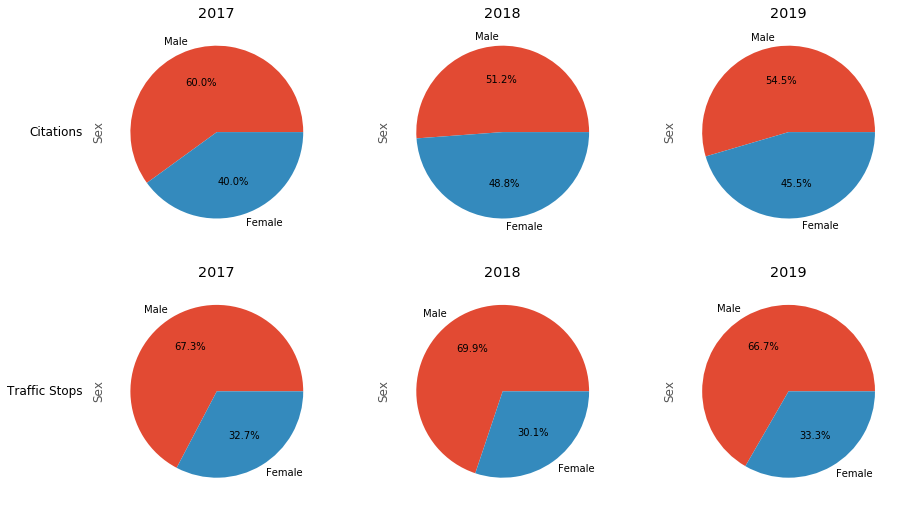

In [310]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,:]['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,:]['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

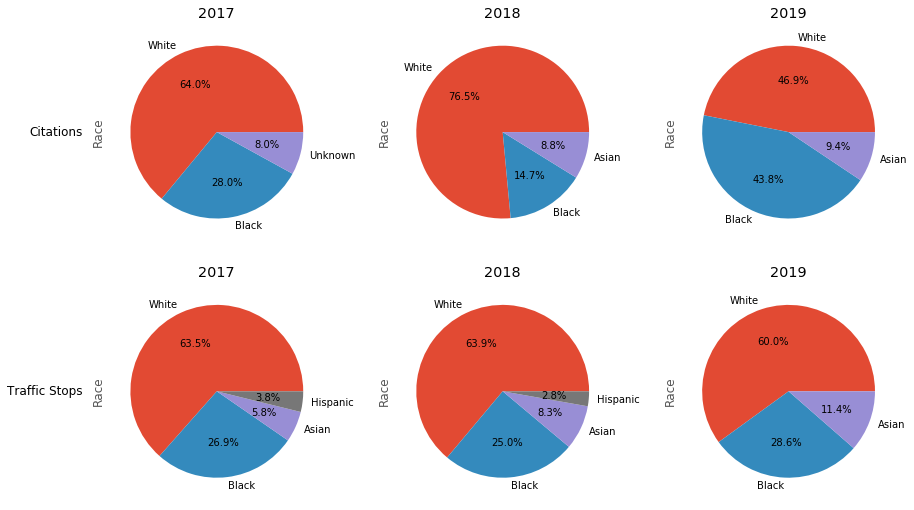

In [312]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,:]['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,:]['Race'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = ax, title = this_year)
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

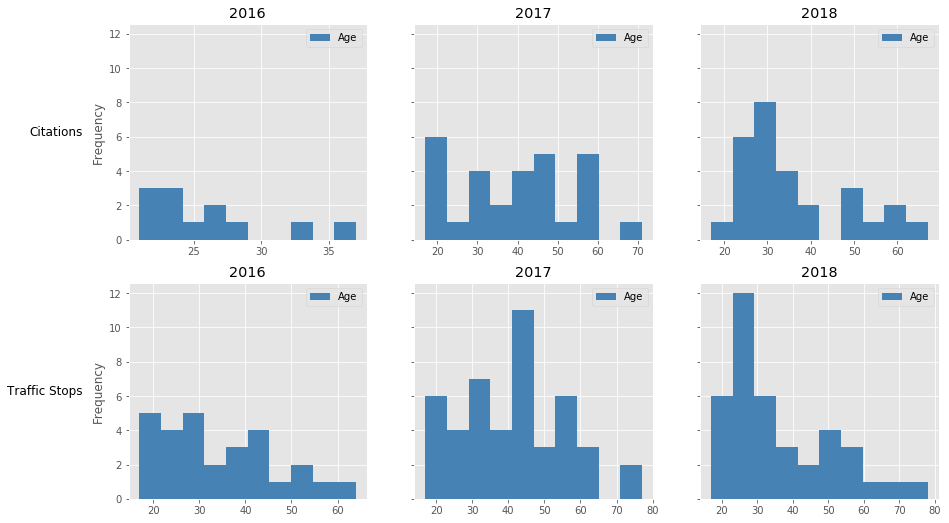

In [321]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3, sharey = True)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

## 6.2 Halloween 

In [318]:
df_names = ['Citations', 'Traffic Stops']
dates = ['10/31/2016 12:00:00 AM', '10/31/2017 12:00:00 AM', '10/31/2018 12:00:00 AM']
years = ['2016', '2017', '2018']

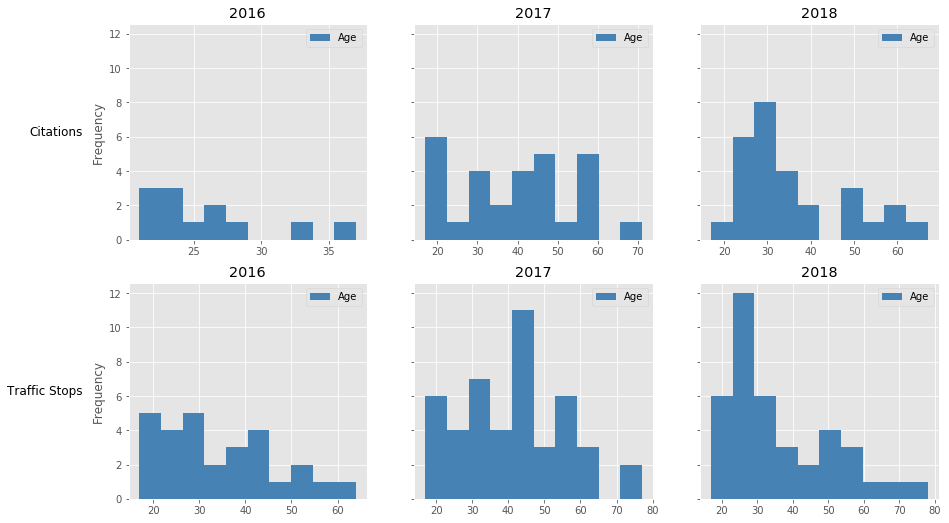

In [320]:
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(figsize=(15,8), nrows = 2, ncols = 3, sharey = True)
    
    for ax, name in zip(axes[:,0], df_names):
        ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
    for ax, this_date, this_year in zip(axes[0,:], dates, years):
        citations_df.loc[citations_df['Citation Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
        
    for ax, this_date, this_year in zip(axes[1,:], dates, years):
        stops_df.loc[stops_df['Stop Date'] == this_date ,['Age']].plot(kind = 'hist', ax = ax, title = this_year, color = 'steelblue')
    
    fig.subplots_adjust(left=0.15, top=0.95)
    

1) Age over weekend vs. weekdays (Day of week)
2) Number of total citations over the years over Christmas
3) Number of total citations over the years over Halloween, Saint Patrick Day's, Thanksgiving, 4th of July, Labor Day
4) Gender over Mother's Day and Father's Day
5) Race over 'Cinco de Mayo'